### **List 2.1 Loading the MNIST dataset in Keras**

In [1]:
from tensorflow. keras.datasets import mnist
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [3]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Clasee Label: 2


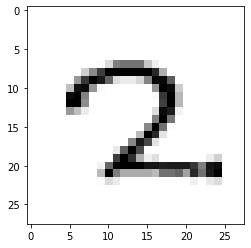

In [5]:
import matplotlib.pyplot as plt
digit = test_images[77]
print("Clasee Label:", test_labels[77])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show() 

In [6]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))
print(len(np.unique(train_labels)))

[5 0 4 ... 5 6 8]
[0 1 2 3 4 5 6 7 8 9]
10


In [7]:
print(test_labels)
print(np.unique(test_labels))
print(len(np.unique(test_labels)))

[7 2 1 ... 4 5 6]
[0 1 2 3 4 5 6 7 8 9]
10


# **Listing 2.2 The Network Architecture**

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add (layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense (10, activation="softmax"))


## **Listing 2.3 The Compilation Step**

In [9]:
network.compile(optimizer="rmsprop",
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

In [10]:
train_images.ndim

3

# **Listing 2.4 Preapring the Image Data**

In [11]:
train_images=train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32")/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float32")/255



# **Listing 2.5 Preparing the Labels**

In [12]:
train_labels[0] # We are getting label directly

5

# **> One-Hot-Encoding**

In [13]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels[0] # The above One-Hot-Encoding converts the label into an array 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# **Listing 2.6 Training the Model**

In [15]:
network.fit(train_images, train_labels, epochs =5, batch_size=60)

Epoch 1/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3650 - accuracy: 0.8916
Epoch 2/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0950 - accuracy: 0.9723
Epoch 3/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0601 - accuracy: 0.9815
Epoch 4/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0439 - accuracy: 0.9868
Epoch 5/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0326 - accuracy: 0.9907


# **Listing 2.7 Evaluate The Network**

In [17]:
test_loss, test_acc = network.evaluate(test_images,  test_labels)
print("Test_loss: ", test_loss)
print("Test_acc: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9796
Test_loss:  0.0729028582572937
Test_acc:  0.9796000123023987
